2.Image  Augmentation 
3.Create model



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
xtrain = train_datagen.flow_from_directory('/content/drive/MyDrive/Classroom/flowers')

Found 2520 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

4.Add Layers

In [ ]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten()) 
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(4,activation='softmax')) 

5.Compile the model

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

6.Fit the model

In [ ]:
model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=10,
                    validation_data=xtest,
                    validation_steps=len(xtest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
13/13 [==============================] - 17s 483ms/step - loss: 2.8257 - accuracy: 0.3021 - val_loss: 1.3794 - val_accuracy: 0.2423
Epoch 2/10
13/13 [==============================] - 6s 471ms/step - loss: 1.2803 - accuracy: 0.4515 - val_loss: 1.2042 - val_accuracy: 0.4939
Epoch 3/10
13/13 [==============================] - 6s 455ms/step - loss: 1.1233 - accuracy: 0.5703 - val_loss: 0.9858 - val_accuracy: 0.6104
Epoch 4/10
13/13 [==============================] - 6s 455ms/step - loss: 0.9527 - accuracy: 0.6357 - val_loss: 0.7862 - val_accuracy: 0.7270
Epoch 5/10
13/13 [==============================] - 6s 454ms/step - loss: 0.8818 - accuracy: 0.6470 - val_loss: 0.7306 - val_accuracy: 0.7362
Epoch 6/10
13/13 [==============================] - 6s 464ms/step - loss: 0.7774 - accuracy: 0.6922 - val_loss: 0.7415 - val_accuracy: 0.6902
Epoch 7/10
13/13 [==============================] - 6s 456ms/step - loss: 0.7191 - accuracy: 0.7068 - val_loss: 0.6056 - val_accuracy: 0.7914
Epoch

7.Save the model

In [ ]:
model.save('rose.h6')

8.Test the model

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
img = image.load_img('/content/drive/MyDrive/Classroom/flowers/dandelion/10477378514_9ffbcec4cf_m.jpg',target_size=(94,94))

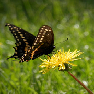

In [ ]:
img

In [ ]:
x = image.img_to_array(img)
x

array([[[ 42.,  59.,  14.],
        [ 46.,  61.,  18.],
        [ 52.,  67.,  24.],
        ...,
        [ 39.,  60.,  21.],
        [ 35.,  56.,  15.],
        [ 37.,  54.,  22.]],

       [[ 36.,  55.,   9.],
        [ 44.,  61.,  17.],
        [ 54.,  71.,  27.],
        ...,
        [ 42.,  60.,  20.],
        [ 40.,  57.,  15.],
        [ 40.,  56.,  20.]],

       [[ 39.,  59.,   6.],
        [ 37.,  58.,  15.],
        [ 43.,  60.,  18.],
        ...,
        [ 45.,  64.,  19.],
        [ 47.,  66.,  21.],
        [ 44.,  60.,  23.]],

       ...,

       [[ 79., 101.,   0.],
        [ 96., 121.,   4.],
        [100., 121.,  26.],
        ...,
        [125., 109.,  58.],
        [ 88., 111.,  29.],
        [ 94., 115.,  10.]],

       [[ 69.,  84.,   0.],
        [ 77.,  97.,   0.],
        [110., 135.,   8.],
        ...,
        [ 98.,  53.,  11.],
        [130., 106.,  60.],
        [123., 147.,  35.]],

       [[ 47.,  68.,   0.],
        [ 38.,  59.,   0.],
        [ 89., 1

In [ ]:
x = np.expand_dims(x,axis=0)
x

array([[[[ 42.,  59.,  14.],
         [ 46.,  61.,  18.],
         [ 52.,  67.,  24.],
         ...,
         [ 39.,  60.,  21.],
         [ 35.,  56.,  15.],
         [ 37.,  54.,  22.]],

        [[ 36.,  55.,   9.],
         [ 44.,  61.,  17.],
         [ 54.,  71.,  27.],
         ...,
         [ 42.,  60.,  20.],
         [ 40.,  57.,  15.],
         [ 40.,  56.,  20.]],

        [[ 39.,  59.,   6.],
         [ 37.,  58.,  15.],
         [ 43.,  60.,  18.],
         ...,
         [ 45.,  64.,  19.],
         [ 47.,  66.,  21.],
         [ 44.,  60.,  23.]],

        ...,

        [[ 79., 101.,   0.],
         [ 96., 121.,   4.],
         [100., 121.,  26.],
         ...,
         [125., 109.,  58.],
         [ 88., 111.,  29.],
         [ 94., 115.,  10.]],

        [[ 69.,  84.,   0.],
         [ 77.,  97.,   0.],
         [110., 135.,   8.],
         ...,
         [ 98.,  53.,  11.],
         [130., 106.,  60.],
         [123., 147.,  35.]],

        [[ 47.,  68.,   0.],
       

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy',
                        patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                        patience=5,
                        factor=0.5,min_lr=0.00001)

callback = [reduce_lr,early_stopping]

In [ ]:

img = image.load_img('/content/drive/MyDrive/Classroom/flowers/dandelion/10486992895_20b344ce2d_n.jpg',target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
